### importing the libraries 

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_column",100)
pd.set_option("display.max_rows",100)

### Reading the file

In [20]:
#Reading the file
data = pd.read_csv(r'D:\Imarticus\Nikta Training\Capstone Project\Python Project Bank Lending\XYZCorp_LendingData.txt',
                      index_col=0, delimiter='\t',parse_dates=['issue_d'])

### Pandas Profiling

In [ ]:

#generating the pandas profiling report for better understanding the dataset what we got and making sense toward better approach..
import pandas_profiling as pf
import pandas as pd 
df=pf.ProfileReport(data)

In [ ]:
#Exporting the generated pandas-profinling report into html extention.....
df.to_file(r"C:\Users\AKASH\OneDrive\Desktop\PYTHON IMARTICUS\Python Project - Bank Lending\lending_data.html")

### Data Splitting

In [21]:
#First we'll do the data split as per given problem statement condition..
train_df=data[data['issue_d']<'2015-6-01']
test_df=data[data['issue_d']>='2015-6-01']

### Data Pre-processing

In [23]:
#Printing the shape of both splitted dataset to get counts of variables and observations...
print(train_df.shape,test_df.shape)

(598978, 72) (256991, 72)


In [24]:
train_df.isnull().sum().sort_values(ascending=False)

verification_status_joint      598978
total_bal_il                   598978
annual_inc_joint               598978
dti_joint                      598978
inq_last_12m                   598978
open_acc_6m                    598978
open_il_12m                    598978
open_il_24m                    598978
mths_since_rcnt_il             598978
open_il_6m                     598978
il_util                        598978
open_rv_12m                    598978
open_rv_24m                    598978
max_bal_bc                     598978
all_util                       598978
total_cu_tl                    598978
inq_fi                         598978
mths_since_last_record         513220
desc                           477177
mths_since_last_major_derog    460751
mths_since_last_delinq         314968
next_pymnt_d                   244687
total_rev_hi_lim                67313
tot_coll_amt                    67313
tot_cur_bal                     67313
emp_title                       34465
emp_length  

In [25]:
#Printing the concise summary about 'train_df' data frame, and will show the information such as- dtypes,non-null value, memory
#usage...
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598978 entries, 1077501 to 36271262
Data columns (total 72 columns):
member_id                      598978 non-null int64
loan_amnt                      598978 non-null float64
funded_amnt                    598978 non-null float64
funded_amnt_inv                598978 non-null float64
term                           598978 non-null object
int_rate                       598978 non-null float64
installment                    598978 non-null float64
grade                          598978 non-null object
sub_grade                      598978 non-null object
emp_title                      564513 non-null object
emp_length                     570873 non-null object
home_ownership                 598978 non-null object
annual_inc                     598978 non-null float64
verification_status            598978 non-null object
issue_d                        598978 non-null datetime64[ns]
pymnt_plan                     598978 non-null object
desc

In [13]:
#We'll view some basics stastical details such as percentile, standard deviation,mean etc.... 
print(train_df.describe())

          member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  5.989780e+05  598978.000000  598978.000000    598978.000000   
mean   2.231985e+07   14540.642519   14521.789031     14478.973948   
std    1.711491e+07    8336.476483    8327.529212      8337.695086   
min    7.069900e+04     500.000000     500.000000         0.000000   
25%    7.205072e+06    8000.000000    8000.000000      8000.000000   
50%    1.763377e+07   12600.000000   12525.000000     12500.000000   
75%    3.943412e+07   20000.000000   20000.000000     20000.000000   
max    5.433202e+07   35000.000000   35000.000000     35000.000000   

            int_rate    installment    annual_inc            dti  \
count  598978.000000  598978.000000  5.989780e+05  598978.000000   
mean       13.520911     434.562058  7.397280e+04      17.638408   
std         4.370961     242.892709  5.676163e+04       8.070746   
min         5.320000      15.690000  3.000000e+03       0.000000   
25%        10.160000     259.

### Dropping variables

In [26]:
# Dropping the variables based on missing values and feature selection
train_df=train_df.drop(['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m',
                          'il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m',
                          'open_acc_6m','verification_status_joint','next_pymnt_d','mths_since_last_record',
                          'mths_since_last_major_derog','mths_since_last_delinq',
                          'dti_joint','desc','annual_inc_joint'],axis=1)

In [27]:
# Checking out the missing values for every variable that present in the dataset
train_df.isnull().sum().sort_values(ascending=False)

tot_cur_bal                   67313
tot_coll_amt                  67313
total_rev_hi_lim              67313
emp_title                     34465
emp_length                    28105
last_pymnt_d                    456
revol_util                      341
collections_12_mths_ex_med       56
last_credit_pull_d               43
title                            18
purpose                           0
annual_inc                        0
pymnt_plan                        0
issue_d                           0
verification_status               0
zip_code                          0
default_ind                       0
sub_grade                         0
home_ownership                    0
dti                               0
grade                             0
installment                       0
int_rate                          0
term                              0
funded_amnt_inv                   0
funded_amnt                       0
loan_amnt                         0
addr_state                  

In [28]:
#Created the manual function for find out the missing values and sorted out as most occured missing data on top and 
#categoriesed the counting form and percentage....
def missing_data(train_df):
    total=train_df.isnull().sum().sort_values(ascending=False)
    percent=(train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
    return(missing_data.head(20))

In [29]:
missing_data(train_df)

total   percent
tot_cur_bal                 67313  0.112380
tot_coll_amt                67313  0.112380
total_rev_hi_lim            67313  0.112380
emp_title                   34465  0.057540
emp_length                  28105  0.046922
last_pymnt_d                  456  0.000761
revol_util                    341  0.000569
collections_12_mths_ex_med     56  0.000093
last_credit_pull_d             43  0.000072
title                          18  0.000030
purpose                         0  0.000000
annual_inc                      0  0.000000
pymnt_plan                      0  0.000000
issue_d                         0  0.000000
verification_status             0  0.000000
zip_code                        0  0.000000
default_ind                     0  0.000000
sub_grade                       0  0.000000
home_ownership                  0  0.000000
dti                             0  0.000000

In [30]:
# Dropping more variables based on complete missing values
# train_df=train_df.drop(['mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m',],axis=1)

KeyError: "['mths_since_rcnt_il' 'open_il_24m' 'open_il_12m' 'open_il_6m'\n 'open_acc_6m'] not found in axis"

In [31]:
# Now take a view of remaining columns in the dataset using below function..
print(train_df.columns)

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')


In [32]:
# We'll checking out the unique record of particular variable.
train_df['pymnt_plan'].value_counts()

n    598973
y         5
Name: pymnt_plan, dtype: int64

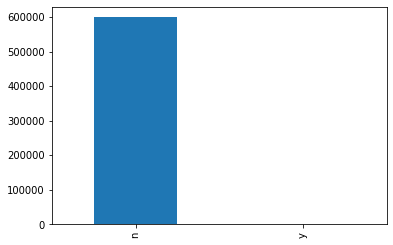

In [33]:
# Plotting the graph and see the most occurance of record in graphical way...
train_df['pymnt_plan'].value_counts().plot.bar()

In [34]:
# Count of y variable is insignificant hence dropping the same 
del train_df['pymnt_plan']

In [ ]:
''''
#generating again profiling report to know the current dataframe description after treating the dataframe with cut off 
#unnecessary things....
import pandas_profiling as pf
import pandas as pd
df=pf.ProfileReport(train_df)
''''

In [ ]:
''''
#Exporting it in to html format...
df.to_file(r'C:\Users\AKASH\OneDrive\Desktop\PYTHON IMARTICUS\Python Project - Bank Lending\lending_train_data.html')
''''

### Missing values treatment

In [35]:
#Imputing the missing values for all the variables...
for x in train_df.columns[:]:
    if train_df[x].dtype=='object':
        train_df[x].fillna(train_df[x].mode()[0],inplace=True)
    elif train_df[x].dtype=='int64' or train_df[x].dtype=='float64':
        train_df[x].fillna(train_df[x].mean(),inplace=True)

In [36]:
# Checking missing values
print(train_df.isnull().sum()) 

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

In [37]:
# Dropped as the same is in the dateformat
print(train_df['last_pymnt_d'].value_counts())

Jan-2016    274421
Dec-2015     93163
Jul-2015     14036
Aug-2015     12178
Jun-2015     11874
Oct-2015     11103
Apr-2015     11102
May-2015     11065
Mar-2015     10755
Sep-2015     10439
Nov-2015      9052
Feb-2015      8848
Jan-2015      8653
Oct-2014      7671
Dec-2014      7249
Sep-2014      6315
Jul-2014      6312
Aug-2014      6301
Nov-2014      6202
Jun-2014      5618
May-2014      4717
Mar-2014      4569
Apr-2014      4319
Jan-2014      3642
Feb-2014      3627
Dec-2013      3031
Oct-2013      2812
Nov-2013      2632
Aug-2013      2498
Sep-2013      2482
Jul-2013      2369
May-2013      2134
Mar-2013      2026
Jun-2013      1972
Apr-2013      1871
Feb-2013      1577
Jan-2013      1437
Oct-2012      1241
Dec-2012      1173
Nov-2012      1156
Aug-2012      1098
Sep-2012      1084
Jul-2012       929
Mar-2012       902
May-2012       841
Jun-2012       826
Apr-2012       813
Feb-2012       757
Jan-2012       546
Dec-2011       544
Mar-2011       488
Nov-2011       454
Oct-2011    

In [38]:
# Dropped as per above explanation
train_df=train_df.drop(['last_pymnt_d'],axis=1)

In [39]:
print(train_df.dtypes)

member_id                              int64
loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
purpose                               object
title                                 object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
earliest_cr_line                      object
inq_last_6

### Converting all variables to numerical

In [40]:
#Conversion of float point variables in to numerical form, first we'll pull out all floating point variable and see..
colname=[]
for x in train_df.columns:
    if train_df[x].dtype=='float64':
        colname.append(x)
        

In [41]:
#Printing the floating point variable
print(colname)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [42]:
#Here we go with transform the variable into numerical form...
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    train_df[x]=le.fit_transform(train_df[x])

In [43]:
print(train_df.dtypes)    

member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                        int64
term                                  object
int_rate                               int64
installment                            int64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                             int64
verification_status                   object
issue_d                       datetime64[ns]
purpose                               object
title                                 object
zip_code                              object
addr_state                            object
dti                                    int64
delinq_2yrs                            int64
earliest_cr_line                      object
inq_last_6

In [44]:
# This variable is used for splitting the data and is not significant for model building
print(train_df['issue_d'].value_counts())

2014-10-01    37442
2015-04-01    34332
2015-01-01    33887
2015-05-01    30923
2014-07-01    28315
2015-03-01    24573
2014-11-01    24143
2015-02-01    22991
2014-05-01    18493
2014-04-01    18458
2014-08-01    18203
2014-06-01    16556
2014-03-01    16012
2014-01-01    15178
2014-02-01    14903
2013-12-01    14609
2013-11-01    14299
2013-10-01    13756
2013-09-01    12694
2013-08-01    12414
2013-07-01    11632
2013-06-01    10663
2014-09-01    10233
2013-05-01    10121
2014-12-01     9929
2013-04-01     9212
2013-03-01     8118
2013-02-01     7424
2013-01-01     6736
2012-11-01     6319
2012-10-01     6228
2012-09-01     6064
2012-12-01     5980
2012-08-01     5398
2012-07-01     4604
2012-06-01     3790
2012-05-01     3386
2012-04-01     3221
2012-03-01     2903
2012-01-01     2595
2012-02-01     2547
2011-12-01     2256
2011-11-01     2225
2011-10-01     2108
2011-09-01     2062
2011-08-01     1925
2011-07-01     1865
2011-06-01     1826
2011-05-01     1701
2011-04-01     1562


In [45]:
# Dropping as per above explanation
del train_df['issue_d']

In [46]:
# checking the unique record for this particular column
print(train_df['zip_code'].value_counts())

945xx    6735
750xx    6389
112xx    6342
606xx    5917
100xx    5393
         ... 
691xx       1
429xx       1
511xx       1
693xx       1
502xx       1
Name: zip_code, Length: 901, dtype: int64


In [47]:
# Zip code is removed as the same is varchar variable hence not significant for model building
del train_df['zip_code']

In [48]:
#We'll check out the unique record for this particular variable..
print(train_df['initial_list_status'].value_counts())

f    361847
w    237131
Name: initial_list_status, dtype: int64


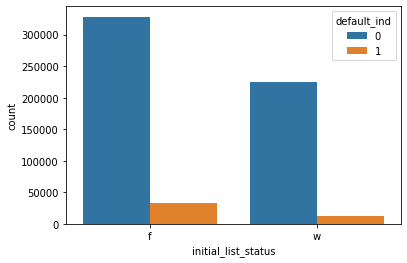

In [49]:
# Plotting the graph for the graphical representation...
sns.countplot('initial_list_status',data=train_df,hue='default_ind')

In [50]:
#doing the lable encoding manually for this particular column
train_df['initial_list_status'] = np.where(train_df['initial_list_status']=='f', 0, train_df['initial_list_status'])
train_df['initial_list_status'] = np.where(train_df['initial_list_status']=='w', 1, train_df['initial_list_status'])

In [51]:
#Checking out it's converted or not
print(train_df['initial_list_status'].value_counts())

0    361847
1    237131
Name: initial_list_status, dtype: int64


In [52]:
#We'll first check unique record for this particular column
train_df['int_rate'].value_counts()

109    20898
173    18026
275    16890
141    12307
55     11310
       ...  
450        1
294        1
223        1
309        1
501        1
Name: int_rate, Length: 502, dtype: int64

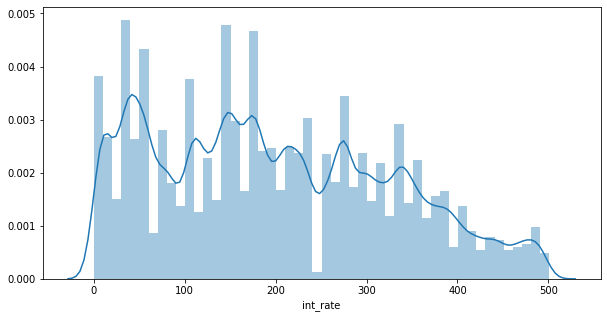

In [53]:
#Ploting the graph for checking out the normal distribution of the variable, and this variable got perfect skewness means it's not 
#right skewed or left skewed so keeping it....
plt.figure(figsize=(10,5))
sns.distplot(train_df['int_rate'])
plt.show()

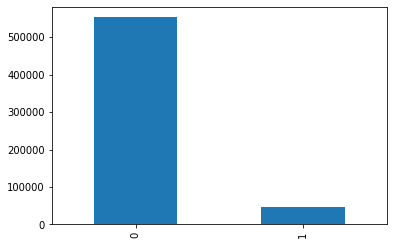

In [54]:
#this variable is our target varaible ploting and checking out the record and got the result as imbalanced data, that's gonna
#be make mistake when we'll try to fit the model and mistake will be read the same values again and again in ration of 9:1,
#and falsly predict the default values as well...
train_df['default_ind'].value_counts().plot.bar()

In [55]:
#will check the unique record for this particular column..
print(train_df['title'].value_counts())

Debt consolidation                                248864
Credit card refinancing                            94817
Home improvement                                   22487
Other                                              18604
Debt Consolidation                                 15469
                                                   ...  
Please Help Me Eliminate High Interest Credit!         1
Auto Purchase                                          1
Broomer-Debt Consolidation                             1
Pay off hi inst. car loan (Wells Fargo)                1
Consolidation and Home improvement                     1
Name: title, Length: 60990, dtype: int64


In [56]:
# Based on domain knowledge the same is removed 
del train_df['title']

In [57]:
# Appending all variables with dtype object 
colname=[]
for x in train_df.columns:
    if train_df[x].dtype=='object':
        colname.append(x)

In [58]:
print(colname)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_credit_pull_d', 'application_type']


In [59]:
#Using lable encoding function we'll fit the 'object' data type variables and transform the data in to numerical form...
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    train_df[x]=le.fit_transform(train_df[x])  

In [60]:
print(train_df.dtypes)

member_id                     int64
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               int64
term                          int32
int_rate                      int64
installment                   int64
grade                         int32
sub_grade                     int32
emp_title                     int32
emp_length                    int32
home_ownership                int32
annual_inc                    int64
verification_status           int32
purpose                       int32
addr_state                    int32
dti                           int64
delinq_2yrs                   int64
earliest_cr_line              int32
inq_last_6mths                int64
open_acc                      int64
pub_rec                       int64
revol_bal                     int64
revol_util                    int64
total_acc                     int64
initial_list_status           int32
out_prncp                     int64
out_prncp_inv               

In [61]:
print(train_df['emp_length'].value_counts())

1     223512
2      53373
3      47128
10     46526
5      38429
0      37879
4      35792
7      32676
6      31338
8      29126
9      23199
Name: emp_length, dtype: int64


In [64]:
# Dropping the variables on domain knowledge
train_df=train_df.drop(['member_id', 'emp_title', 'addr_state', 'earliest_cr_line', 'out_prncp_inv', 'total_rec_late_fee',
                       'last_credit_pull_d', 'policy_code', 'application_type'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250834C95C8>,
      dtype=object)

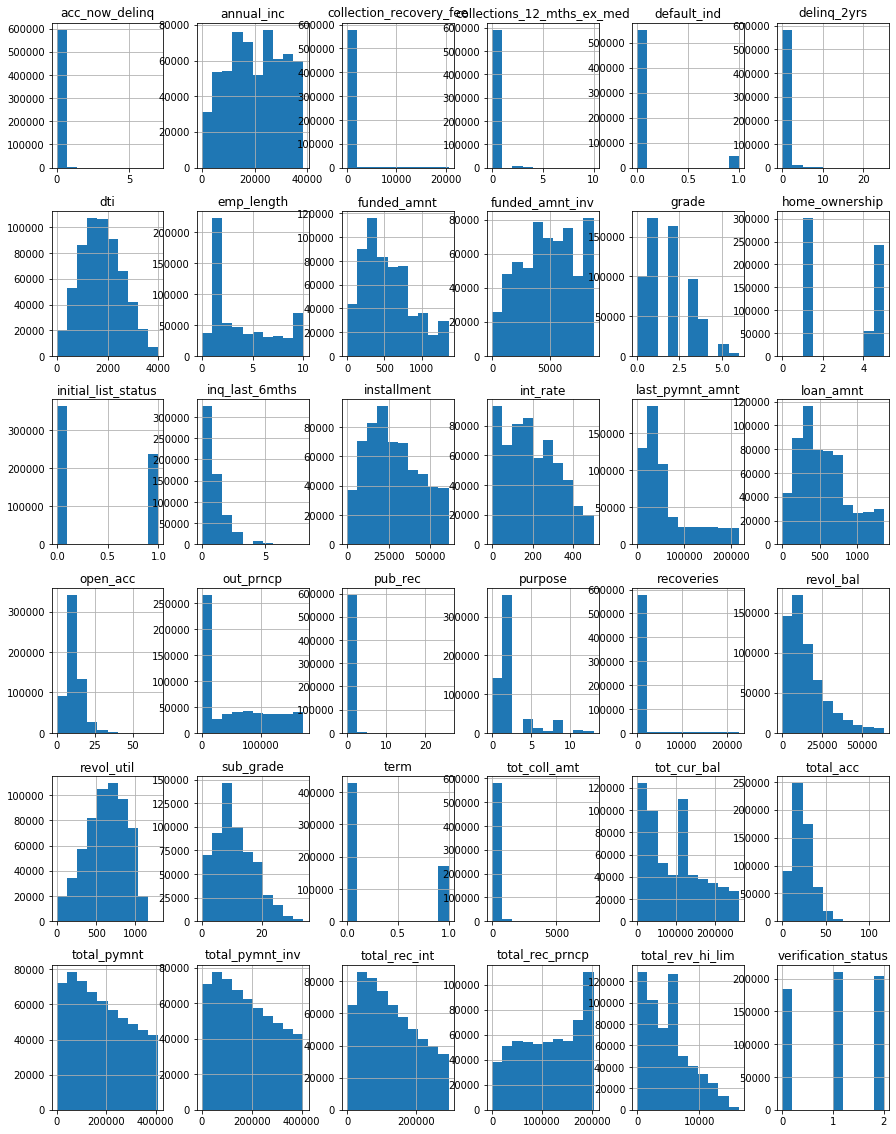

In [65]:
# Plotting histogram of all variables and check out the frequency distribution for remaining variables in the dataset
train_df.hist(figsize=(15,20))

In [66]:
#checking the correlation for identify of enstablished relationship in between variables 
lis=train_df[train_df.columns].corr()['default_ind'][:]
print(train_df[train_df.columns].corr()['default_ind'][:])

loan_amnt                     0.001081
funded_amnt                   0.000192
funded_amnt_inv              -0.003968
term                          0.045920
int_rate                      0.165143
installment                   0.007531
grade                         0.144624
sub_grade                     0.148051
emp_length                    0.013159
home_ownership                0.039103
annual_inc                   -0.066549
verification_status           0.044681
purpose                       0.046813
dti                           0.028366
delinq_2yrs                  -0.006752
inq_last_6mths                0.072243
open_acc                     -0.016833
pub_rec                      -0.017069
revol_bal                    -0.023930
revol_util                    0.044258
total_acc                    -0.024784
initial_list_status          -0.071607
out_prncp                    -0.257892
total_pymnt                  -0.147902
total_pymnt_inv              -0.149497
total_rec_prncp          

In [67]:
corr=train_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

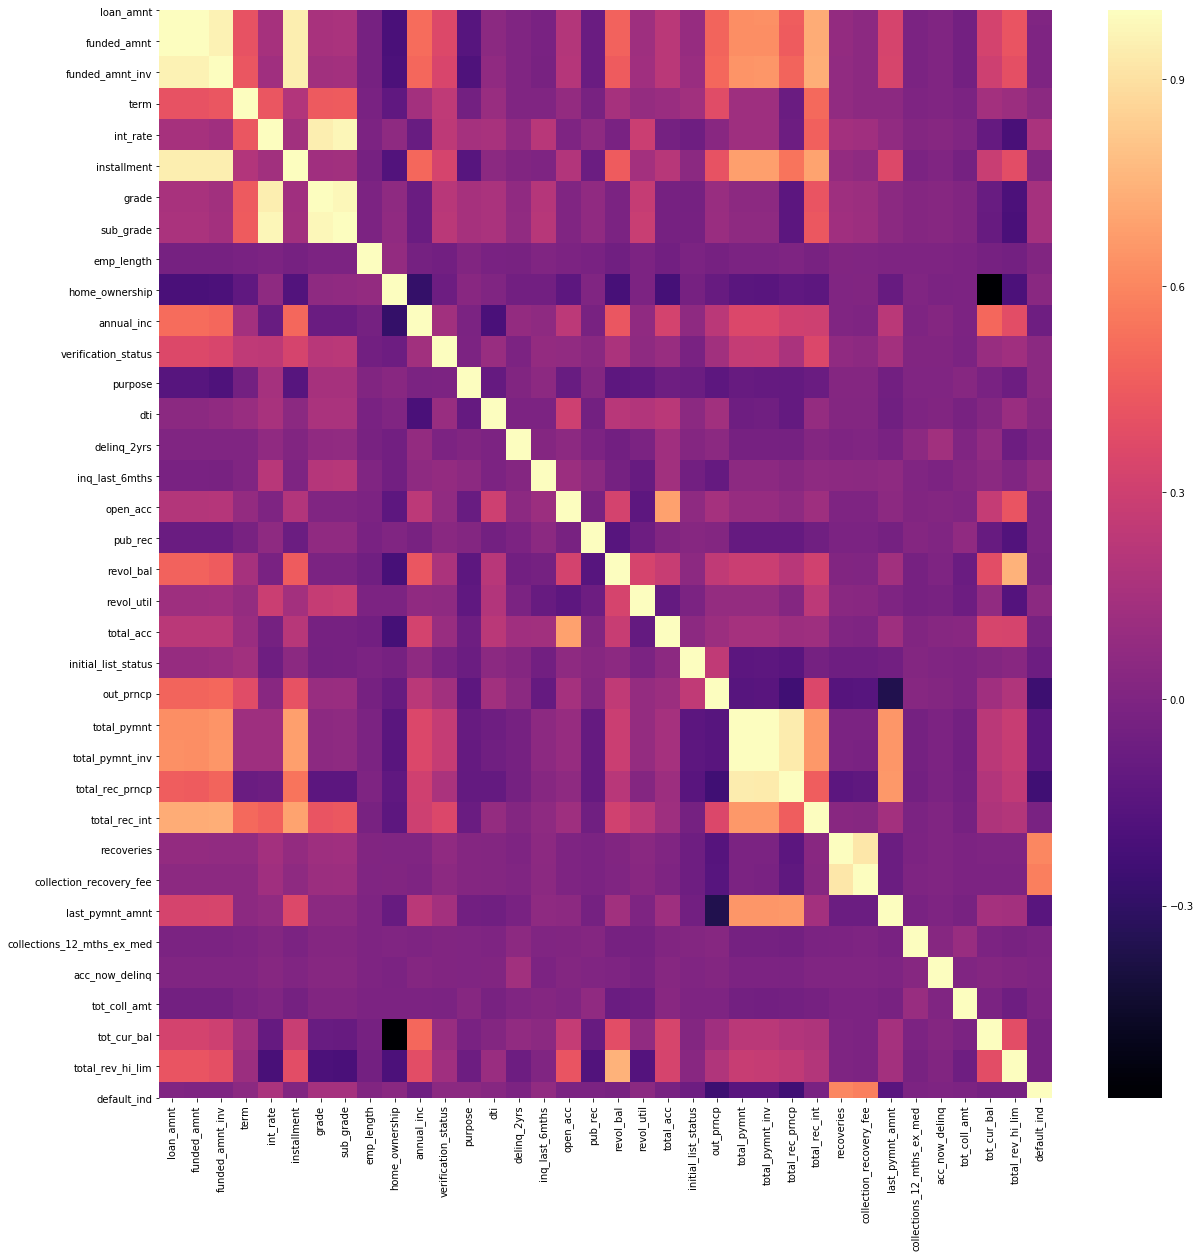

In [68]:
#Plotting the heatmap for checking out the correlation in betwwen the variables...
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),annot=False,cmap='magma')

Text(0.5, 1.0, 'Total committed by Investors')

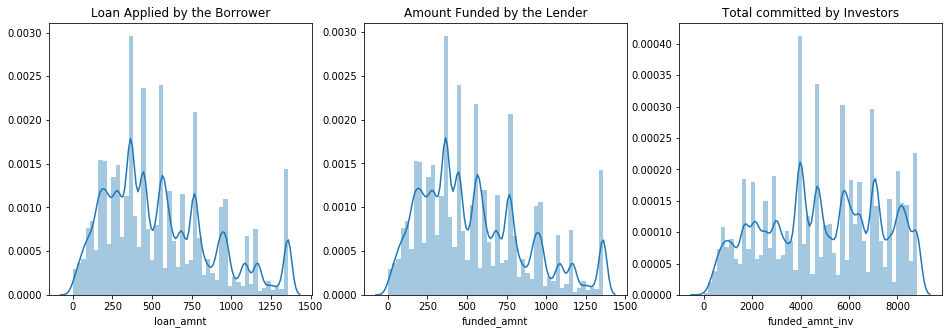

In [69]:
#checking out the continuous variable ploting density plots thats used to observe the distribution of a variable in a dataset.
#It plots the graph on a continuous interval or time-period, An advantage of Density Plots over Histograms 
#is that they're better at determining the distribution shape because they're not affected by the number of bins
fig, ax = plt.subplots(1, 3, figsize=(16,5))
sns.distplot(train_df['loan_amnt'],ax=ax[0])
sns.distplot(train_df['funded_amnt'], ax=ax[1])
sns.distplot(train_df['funded_amnt_inv'], ax=ax[2])

ax[1].set_title("Amount Funded by the Lender")
ax[0].set_title("Loan Applied by the Borrower")
ax[2].set_title("Total committed by Investors")

In [75]:
#After ploting the heatmap found variable with very low correlation and had some variable with same distribution
# we'll treat the model as unnecessary sampled performing again and again, found some highly skewed variable too....

train_df=train_df.drop(['funded_amnt_inv','funded_amnt','delinq_2yrs','collections_12_mths_ex_med','acc_now_delinq',
                        'tot_coll_amt'],axis=1)

### Splitting data into training and testing

In [76]:
#Spiting the dataset into X and Y
X=train_df.iloc[:,0:-1].values
Y=train_df.iloc[:,-1].values

In [77]:
print(X.shape)
print(Y.shape)

(598978, 29)
(598978,)


([<matplotlib.axis.XTick at 0x250eb0ddb48>,
 <a list of 2 Text xticklabel objects>)

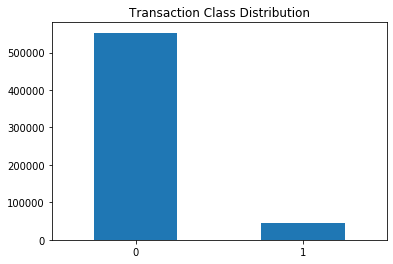

In [78]:
# Ploting the count plot for the dependent variable and identifying the imbalanced data and perform oversampling technique.
count_classes = pd.value_counts(train_df['default_ind'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

# Interpretation - It is observed that the y varibale is imbalanced 

### Resampling of the data

In [79]:
# We'll first split the classified binary numbers in to 'approved', and 'reject' two seperated variable
approved = train_df[train_df['default_ind']==1]

reject = train_df[train_df['default_ind']==0]

In [80]:
#Now will check the shape of stored 0's and 1's in diffrent-diffrent variable
print(approved.shape,reject.shape)

(46156, 30) (552822, 30)


In [ ]:
''''
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)
''''

In [ ]:
''''
print(X_res.shape,y_res.shape)
''''

In [ ]:
''''
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))
''''

In [81]:
# Performing RandomOverSampler technique to handle imbalanced data, imblearn package that help to identfy the imbalanced 
# data and performed oversampling technique for the model
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_o_res, Y_o_res = os.fit_sample(X, Y)

In [82]:
print(X_o_res.shape,Y_o_res.shape)

(1105644, 29) (1105644,)


In [83]:
# We are printing the original dataset values and after oversampling values
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_o_res)))

Original dataset shape Counter({0: 552822, 1: 46156})
Resampled dataset shape Counter({0: 552822, 1: 552822})


### Scaling the data

In [84]:

#performing standardScaler for removes the mean and scales each feature/variable to unit variance. This operation is performed 
#feature-wise in an independent way. StandardScaler can be influenced by outliers
#(if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_o_res)


StandardScaler()

In [85]:

#Transforming
X_o_res=scaler.transform(X_o_res)
print(X_o_res)


[[-1.14542943 -0.68637919 -1.00309577 ... -0.8007862   0.26263084
   0.31099823]
 [-1.44523567  1.45692064  0.24538835 ... -0.89209701  0.26263084
   0.31099823]
 [-1.45722792 -0.68637919  0.40428633 ...  0.0613912   0.26263084
   0.31099823]
 ...
 [-0.50084601 -0.68637919 -0.0497079  ... -0.44562112 -1.18159837
  -0.79955488]
 [-0.78566194 -0.68637919  0.38915319 ... -0.59427395 -0.3496128
  -0.98769425]
 [ 0.65340802  1.45692064  0.47238546 ... -0.20160822  0.08805612
   2.0399342 ]]


In [86]:

from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_o_res,Y_o_res,test_size=0.3, random_state=10)


### Model Building 

In [87]:
from sklearn.linear_model import LogisticRegression
classfier=LogisticRegression()
classfier.fit(X_train,Y_train)

Y_pred=classfier.predict(X_val)

print(list(zip(Y_val,Y_pred)))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1),

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)
print("classification report: ")
print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print("Accuracy of the model: ",acc)

[[164164   1595]
 [  6750 159185]]
classification report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    165759
           1       0.99      0.96      0.97    165935

    accuracy                           0.97    331694
   macro avg       0.98      0.97      0.97    331694
weighted avg       0.98      0.97      0.97    331694

Accuracy of the model:  0.9748412693627259


In [89]:
#adjusting the threshold, default point is 0.5 always for camparison with matrix values
#store the predicted probabilities
Y_pred_prob=classfier.predict_proba(X_val)
print(Y_pred_prob)

[[0.97255171 0.02744829]
 [0.80003756 0.19996244]
 [0.95793797 0.04206203]
 ...
 [0.99877426 0.00122574]
 [0.         1.        ]
 [0.         1.        ]]


In [90]:
#implemeting the accouracy for one
Y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value>0.32:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
print(Y_pred_class)

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 

In [337]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred_class)
print(cfm)
print("classification report: ")
print(classification_report(Y_val,Y_pred_class))

acc=accuracy_score(Y_val,Y_pred_class)
print("Accuracy of the model: ",acc)

[[158679   7080]
 [  5513 160422]]
classification report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    165759
           1       0.96      0.97      0.96    165935

    accuracy                           0.96    331694
   macro avg       0.96      0.96      0.96    331694
weighted avg       0.96      0.96      0.96    331694

Accuracy of the model:  0.9620342846117205


In [91]:
#just checking for what actual threshold suitable for model_accuracy, suggested threshold 
#would be takenin  between 0.3 and 0.6
for a in np.arange(0.3,0.61,0.01):
    predict_mine=np.where(Y_pred_prob[:,1]>a,1,0)
    cfm=confusion_matrix(Y_val,predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Error at threshold",a, ":",total_err,", type 2 error :",
          cfm[1,0],", type 1 error:", cfm[0,1])

Error at threshold 0.3 : 10165 , type 2 error : 5167 , type 1 error: 4998
Error at threshold 0.31 : 9946 , type 2 error : 5224 , type 1 error: 4722
Error at threshold 0.32 : 9778 , type 2 error : 5299 , type 1 error: 4479
Error at threshold 0.33 : 9608 , type 2 error : 5355 , type 1 error: 4253
Error at threshold 0.34 : 9477 , type 2 error : 5446 , type 1 error: 4031
Error at threshold 0.35000000000000003 : 9350 , type 2 error : 5514 , type 1 error: 3836
Error at threshold 0.36000000000000004 : 9209 , type 2 error : 5572 , type 1 error: 3637
Error at threshold 0.37000000000000005 : 9044 , type 2 error : 5622 , type 1 error: 3422
Error at threshold 0.38000000000000006 : 8960 , type 2 error : 5726 , type 1 error: 3234
Error at threshold 0.39000000000000007 : 8876 , type 2 error : 5812 , type 1 error: 3064
Error at threshold 0.4000000000000001 : 8801 , type 2 error : 5897 , type 1 error: 2904
Error at threshold 0.4100000000000001 : 8702 , type 2 error : 5962 , type 1 error: 2740
Error at 

In [92]:
# auc mostly checks for getting model proficiancy is good or bad or very good
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_val,Y_pred_class)
auc=metrics.auc(fpr,tpr)
print(auc)

0.9705223258394217


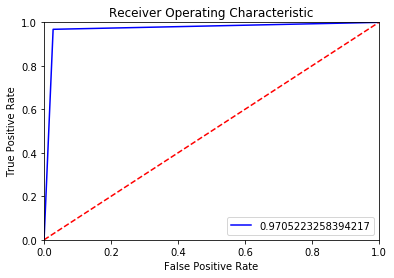

In [95]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# K-FOLD CROSS VALIDATION

In [98]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.97538601 0.97592868 0.97572195 0.97485626 0.97473997 0.97590284
 0.97455908 0.97623878 0.97605788 0.97564442]
0.9755035855029395


In [99]:
for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_cv=classifier.predict(X_val)
print(list(zip(Y_val,Y_pred_cv)))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1),

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_val,Y_pred_cv)
print(cfm)
print("classification report: ")
print(classification_report(Y_val,Y_pred_cv))

acc=accuracy_score(Y_val,Y_pred_cv)
print("Accuracy of the model: ",acc)

[[164244   1515]
 [  6733 159202]]
classification report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    165759
           1       0.99      0.96      0.97    165935

    accuracy                           0.98    331694
   macro avg       0.98      0.98      0.98    331694
weighted avg       0.98      0.98      0.98    331694

Accuracy of the model:  0.9751337075738482


## AUC

In [ ]:
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_val,Y_pred_cv)
auc=metrics.auc(fpr,tpr)
print(auc)

## ROC

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [107]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_val)

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)

print("Classification_Report")
print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print("Accuracy of the model : ",acc)

[[165755      4]
 [     0 165935]]
Classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165759
           1       1.00      1.00      1.00    165935

    accuracy                           1.00    331694
   macro avg       1.00      1.00      1.00    331694
weighted avg       1.00      1.00      1.00    331694

Accuracy of the model :  0.9999879406923249


In [103]:
#prediction using decision tree classfier
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion='gini',random_state=10,splitter="best")
#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_val)

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)

print("Classification_Report")
print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print("Accuracy of the model : ",acc)

[[165160    599]
 [     0 165935]]
Classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165759
           1       1.00      1.00      1.00    165935

    accuracy                           1.00    331694
   macro avg       1.00      1.00      1.00    331694
weighted avg       1.00      1.00      1.00    331694

Accuracy of the model :  0.9981941186756468


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred_class)
print(cfm)
acc=print(accuracy_score("Accuracy of the model",acc))
print(classification_report(Y_val,Y_pred_class))

### PREDICTION ON TEST DATA

In [111]:
test_df.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                         
68587652   73477494    25000.0      25000.0          25000.0   36 months   
66624733   71350547    18000.0      18000.0          18000.0   60 months   
68446769   73336592     7000.0       7000.0           7000.0   36 months   
68595206   73484978    20000.0      20000.0          20000.0   36 months   
68587491   73477331    15000.0      15000.0          15000.0   36 months   

          int_rate  installment grade sub_grade           emp_title  \
id                                                                    
68587652      5.32       752.87     A        A1            Director   
66624733     19.48       471.70     E        E2    Software Manager   
68446769      7.49       217.72     A        A4             Carrier   
68595206     17.97       722.75     D        D4       Nurse Manager   
68587491      6.99       463.09     A        A3  Purchasing Manager   

         emp_length home_ownership  annual_inc verification_status    issue_d  \
id                                                                              
68587652     1 year       MORTGAGE    150000.0        Not Verified 2015-12-01   
66624733    7 years           RENT    150000.0        Not Verified 2015-12-01   
68446769  10+ years       MORTGAGE     59000.0        Not Verified 2015-12-01   
68595206    7 years       MORTGAGE    180000.0        Not Verified 2015-12-01   
68587491    2 years       MORTGAGE     93000.0        Not Verified 2015-12-01   

         pymnt_plan desc             purpose                    title  \
id                                                                      
68587652          n  NaN         credit_card  Credit card refinancing   
66624733          n  NaN  debt_consolidation       Debt consolidation   
68446769          n  NaN         credit_card  Credit card refinancing   
68595206          n  NaN  debt_consolidation       Debt consolidation   
68587491          n  NaN         credit_card  Credit card refinancing   

         zip_code addr_state    dti  delinq_2yrs earliest_cr_line  \
id                                                                  
68587652    054xx         VT   9.54          0.0         Feb-1996   
66624733    916xx         CA   9.39          0.0         Jun-2005   
68446769    215xx         MD  13.06          1.0         Oct-1996   
68595206    778xx         TX  25.10          0.0         Apr-1989   
68587491    020xx         MA  14.86          0.0         Oct-1993   

          inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
id                                                                         
68587652             0.0                     NaN                     NaN   
66624733             1.0                     NaN                    75.0   
68446769             1.0                    23.0                     NaN   
68595206             0.0                     NaN                     NaN   
68587491             1.0                     NaN                     NaN   

          open_acc  pub_rec  revol_bal  revol_util  total_acc  \
id                                                              
68587652       7.0      0.0    19339.0        42.5       18.0   
66624733      18.0      1.0    14052.0        40.7       27.0   
68446769      10.0      0.0    10467.0        24.2       34.0   
68595206      13.0      0.0    59126.0        92.1       30.0   
68587491       8.0      0.0    14914.0        43.2       17.0   

         initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
id                                                                    
68587652                   w   24357.97       24357.97       682.67   
66624733                   w   17820.50       17820.50       286.64   
68446769                   w    7000.00        7000.00         0.00   
68595206                   w   20000.00       20000.00         0.00   


In [112]:
test_df.shape

(256991, 72)

In [113]:
test_df.dtypes

member_id                               int64
loan_amnt                             float64
funded_amnt                           float64
funded_amnt_inv                       float64
term                                   object
int_rate                              float64
installment                           float64
grade                                  object
sub_grade                              object
emp_title                              object
emp_length                             object
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_d                        datetime64[ns]
pymnt_plan                             object
desc                                   object
purpose                                object
title                                  object
zip_code                               object
addr_state                             object
dti                               

In [114]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256991 entries, 68587652 to 47058483
Data columns (total 72 columns):
member_id                      256991 non-null int64
loan_amnt                      256991 non-null float64
funded_amnt                    256991 non-null float64
funded_amnt_inv                256991 non-null float64
term                           256991 non-null object
int_rate                       256991 non-null float64
installment                    256991 non-null float64
grade                          256991 non-null object
sub_grade                      256991 non-null object
emp_title                      242013 non-null object
emp_length                     242035 non-null object
home_ownership                 256991 non-null object
annual_inc                     256991 non-null float64
verification_status            256991 non-null object
issue_d                        256991 non-null datetime64[ns]
pymnt_plan                     256991 non-null object
des

In [115]:
test_df.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  2.569910e+05  256991.000000  256991.000000    256991.000000   
mean   6.376366e+07   15223.206163   15223.206163     15215.357153   
std    5.739470e+06    8610.010667    8610.010667      8605.673197   
min    7.082500e+04    1000.000000    1000.000000       900.000000   
25%    5.951889e+07    8450.000000    8450.000000      8425.000000   
50%    6.452709e+07   14000.000000   14000.000000     14000.000000   
75%    6.836905e+07   20000.000000   20000.000000     20000.000000   
max    7.351969e+07   35000.000000   35000.000000     35000.000000   

            int_rate    installment    annual_inc            dti  \
count  256991.000000  256991.000000  2.569910e+05  256991.000000   
mean       12.426461     440.144417  7.763123e+04      19.249675   
std         4.265164     245.616191  7.897454e+04      29.283492   
min         5.320000      30.120000  0.000000e+00       0.000000   
25%         9.170000     261.880000  4.700000e+04      12.580000   
50%        12.290000     382.550000  6.500000e+04      18.620000   
75%        14.650000     578.680000  9.200000e+04      25.390000   
max        28.990000    1445.460000  9.500000e+06    9999.000000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  256991.00000   256991.000000           132147.000000   
mean        0.34530        0.563654               34.188540   
std         0.91938        0.861837               22.021674   
min         0.00000        0.000000                0.000000   
25%         0.00000        0.000000               15.000000   
50%         0.00000        0.000000               31.000000   
75%         0.00000        1.000000               50.000000   
max        30.00000        5.000000              171.000000   

       mths_since_last_record       open_acc        pub_rec     revol_bal  \
count            45426.000000  256991.000000  256991.000000  2.569910e+05   
mean                66.055849      11.974217       0.233623  1.785004e+04   
std                 24.708209       5.660604       0.652832  2.494706e+04   
min                  0.000000       1.000000       0.000000  0.000000e+00   
25%                 50.000000       8.000000       0.000000  6.484000e+03   
50%                 67.000000      11.000000       0.000000  1.198200e+04   
75%                 82.000000      15.000000       0.000000  2.146200e+04   
max                120.000000      82.000000      86.000000  2.904836e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  256886.000000  256991.000000  256991.000000  256991.000000   
mean       53.110827      25.368410   13734.140712   13726.968036   
std        23.935348      12.050762    8415.917128    8411.413367   
min         0.000000       4.000000       0.000000       0.000000   
25%        35.200000      17.000000    7255.305000    7253.220000   
50%        53.200000      24.000000   12280.720000   12273.150000   
75%        71.400000      32.000000   19116.340000   19098.780000   
max       193.000000     169.000000   49372.860000   49372.860000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  256991.000000    256991.000000    256991.000000  256991.000000   
mean     2013.402522      2012.425692      1469.197631     544.062637   
std      3210.762071      3209.120390      3051.741966     563.498895   
min         0.000000         0.000000         0.000000       0.000000   
25%       604.680000       604.295000       382.440000     161.275000   
50%      1263.350000      1262.790000       789.830000     358.330000   
75%      2310.845000      2310.810000      1469.030000     734.700000   
max     39967.550000     39967.550000     35000.000000    5621.670000   

       total_rec_late_fee     recoveries  collection_recovery_fee  \
count       256991.000000  256991.000000                 256991.0   
mean             0.039884       0.102371                      0.0   
std              

In [116]:
test_df=test_df.drop(["addr_state","annual_inc_joint","application_type","desc","dti_joint","earliest_cr_line",
                      "emp_title","member_id","last_credit_pull_d","mths_since_last_delinq",
                      "mths_since_last_major_derog","mths_since_last_record","next_pymnt_d",
                      "out_prncp_inv","policy_code","total_rec_late_fee","verification_status_joint",
                      "total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util",
                      "inq_fi","total_cu_tl","inq_last_12m","inq_last_12m"],axis=1)

In [117]:
print(test_df.isnull().sum())

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     14956
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             15
zip_code                           0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       105
total_acc                          0
initial_list_status                0
out_prncp                          0
t

In [118]:
test_df=test_df.drop(['default_ind'],axis=1)

In [119]:
test_df=test_df.drop(['open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il'],axis=1)

In [120]:
print(test_df.isnull().sum())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    14956
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                            15
zip_code                          0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      105
total_acc                         0
initial_list_status               0
out_prncp                         0
total_pymnt                 

In [121]:
for x in test_df.columns[:]:
    if test_df[x].dtype=='object':
        test_df[x].fillna(test_df[x].mode()[0],inplace=True)
    elif test_df[x].dtype=='int64' or test_df[x].dtype=='float64':
        test_df[x].fillna(test_df[x].mean(),inplace=True)

In [123]:
print(test_df.isnull().sum())

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
recoveri

In [124]:
colname=[]
for x in test_df.columns:
    if test_df[x].dtype=='object':
        colname.append(x)
print(colname) 

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'initial_list_status', 'last_pymnt_d']


In [125]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
for x in colname:
    test_df[x]=le.fit_transform(test_df[x])

In [126]:
colname=[]
for x in test_df.columns:
    if test_df[x].dtype=='float64':
        colname.append(x)
print(colname)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [127]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for x in colname:
    test_df[x]=le.fit_transform(test_df[x])   

In [128]:
print(test_df.dtypes)  

loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                        int64
term                                   int32
int_rate                               int64
installment                            int64
grade                                  int32
sub_grade                              int32
emp_length                             int32
home_ownership                         int32
annual_inc                             int64
verification_status                    int32
issue_d                       datetime64[ns]
pymnt_plan                             int32
purpose                                int32
title                                  int32
zip_code                               int32
dti                                    int64
delinq_2yrs                            int64
inq_last_6mths                         int64
open_acc                               int64
pub_rec                                int64
revol_bal 

In [129]:
test_df=test_df.drop(['issue_d','last_pymnt_d','funded_amnt_inv','funded_amnt','delinq_2yrs','collections_12_mths_ex_med',
                      'acc_now_delinq','tot_coll_amt'],axis=1)

In [130]:
test_df=test_df.drop(['title','zip_code','pymnt_plan'],axis=1)

In [131]:
print(test_df.shape)

(256991, 29)


In [132]:
#doing prediction for actual one means on decision tree 
test=test_df.values
#test=scaler.transform(test)

In [133]:
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [134]:
test_pred=classifier.predict(test)

In [135]:
test_df["pred"]=test_pred
print(test_df.head())

          loan_amnt  term  int_rate  installment  grade  sub_grade  \
id                                                                   
68587652        960     0         0        23681      0          0   
66624733        680     1        60        14835      4         21   
68446769        240     0        11         4278      0          3   
68595206        760     0        52        23014      3         18   
68587491        560     0         9        14499      0          2   

          emp_length  home_ownership  annual_inc  verification_status  \
id                                                                      
68587652           0               1       16473                    0   
66624733           7               3       16473                    0   
68446769           1               1        8454                    0   
68595206           7               1       16849                    0   
68587491           2               1       13689                    0  

In [136]:
print(test_df.shape)

(256991, 30)


In [138]:
test_df1=test_df.drop(['total_rev_hi_lim','tot_cur_bal','last_pymnt_amnt','collection_recovery_fee','recoveries',
                       'total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt','out_prncp','initial_list_status',
                       'total_acc','revol_util','revol_bal','pub_rec','open_acc','inq_last_6mths','dti','purpose',
                       'verification_status','annual_inc','home_ownership','emp_length','sub_grade','grade','installment',
                       'int_rate','term','loan_amnt'],axis=1)

In [139]:
test_df1.head

<bound method NDFrame.head of           pred
id            
68587652     0
66624733     0
68446769     0
68595206     0
68587491     0
...        ...
47877343     0
46848164     0
47471631     0
46735363     0
47058483     0

[256991 rows x 1 columns]>

In [142]:
test_df1["pred"]= test_df1.pred.map({0:"potential non defaulter", 1:"potential defaulter" })

In [143]:
test_df1.to_excel("XYZcorp_prediction.xlsx",header="True")

In [149]:
print(test_df1['pred'].value_counts())

potential non defaulter    256870
potential defaulter           121
Name: pred, dtype: int64
